In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fifa19/data.csv


# FIFA 19 Complete Player Dataset Analysis

The objective of this analysis is to find the most favorable player in FIFA 19.

First of all, we need to read our dataset and check it in our environment.

In [2]:
import matplotlib.pyplot as plt

fifa19_all_data = pd.read_csv('/kaggle/input/fifa19/data.csv')
fifa19_all_data

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,18202,238813,J. Lundstram,19,https://cdn.sofifa.org/players/4/19/238813.png,England,https://cdn.sofifa.org/flags/14.png,47,65,Crewe Alexandra,...,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,€143K
18203,18203,243165,N. Christoffersson,19,https://cdn.sofifa.org/players/4/19/243165.png,Sweden,https://cdn.sofifa.org/flags/46.png,47,63,Trelleborgs FF,...,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,€113K
18204,18204,241638,B. Worman,16,https://cdn.sofifa.org/players/4/19/241638.png,England,https://cdn.sofifa.org/flags/14.png,47,67,Cambridge United,...,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,€165K
18205,18205,246268,D. Walker-Rice,17,https://cdn.sofifa.org/players/4/19/246268.png,England,https://cdn.sofifa.org/flags/14.png,47,66,Tranmere Rovers,...,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,€143K


Let's check overall information of the dataset such as attributes' data types etc.

In [3]:
fifa19_all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Club                      17966 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  
 14  Prefer

Secondly, let's create a new dataframe with the attributes we will use in the direction of our goal. We can select the attributes by examining the above detailed attribute list.

In [4]:
limited_df = fifa19_all_data[["Name", "Age", "Nationality", "Overall", "Potential", "Club", "Value", "Wage", 
                                "International Reputation", "Position"]]
limited_df

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,International Reputation,Position
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,5.0,RF
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,5.0,ST
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,5.0,LW
3,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,4.0,GK
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,4.0,RCM
...,...,...,...,...,...,...,...,...,...,...
18202,J. Lundstram,19,England,47,65,Crewe Alexandra,€60K,€1K,1.0,CM
18203,N. Christoffersson,19,Sweden,47,63,Trelleborgs FF,€60K,€1K,1.0,ST
18204,B. Worman,16,England,47,67,Cambridge United,€60K,€1K,1.0,ST
18205,D. Walker-Rice,17,England,47,66,Tranmere Rovers,€60K,€1K,1.0,RW


Let's convert **value** and **wage** attributes' data types to complete numeric type. At the moment they include string values such as Euro sign and abbreviations like M and K for Millions etc.

In [5]:
# Clean '€' symbol
limited_df.loc[:, 'Value'] = limited_df.loc[:, 'Value'].str.replace('€', '')
limited_df.loc[:, 'Wage'] = limited_df.loc[:, 'Wage'].str.replace('€', '')

# Replace 'M' with 1.000.000 and 'K' with 1.000
limited_df.loc[:, 'Value'] = limited_df.loc[:, 'Value'].str.replace('M', ' 1000000').str.replace('K', ' 1000')
limited_df.loc[:, 'Value'] = limited_df.loc[:, 'Value'].str.split(' ', expand=True)[0].astype(float) * limited_df.loc[:, 'Value'].str.split(' ', expand=True)[1].astype(float)
limited_df.loc[:, 'Wage'] = limited_df.loc[:, 'Wage'].str.replace('M', ' 1000000').str.replace('K', ' 1000')
limited_df.loc[:, 'Wage'] = limited_df.loc[:, 'Wage'].str.split(' ', expand=True)[0].astype(float) * limited_df.loc[:, 'Wage'].str.split(' ', expand=True)[1].astype(float)

limited_df

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,International Reputation,Position
0,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,5.0,RF
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,5.0,ST
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000.0,5.0,LW
3,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,4.0,GK
4,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,355000.0,4.0,RCM
...,...,...,...,...,...,...,...,...,...,...
18202,J. Lundstram,19,England,47,65,Crewe Alexandra,60000.0,1000.0,1.0,CM
18203,N. Christoffersson,19,Sweden,47,63,Trelleborgs FF,60000.0,1000.0,1.0,ST
18204,B. Worman,16,England,47,67,Cambridge United,60000.0,1000.0,1.0,ST
18205,D. Walker-Rice,17,England,47,66,Tranmere Rovers,60000.0,1000.0,1.0,RW


Because this is a "game", I don't prefer having aged players especially if they are very costly for my club. That is why I want to find the most favorable player according to the following criterias; the player
* should **not** be more than 30 years old.
* should **not** have the maximum reputation because this brings lots of costs along with it.
* should have the possible highest potential.

These criterias can be expandable if necessary. 

In [6]:
filteredby_age_df = limited_df[(limited_df["Age"] < 30) & (limited_df["Age"] > 22)].sort_values(by=['Wage', 'Value'], ascending=False)
filteredby_age_df

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,International Reputation,Position
4,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,355000.0,4.0,RCM
11,T. Kroos,28,Germany,90,90,Real Madrid,76500000.0,355000.0,4.0,LCM
36,G. Bale,28,Wales,88,88,Real Madrid,60000000.0,355000.0,4.0,ST
5,E. Hazard,27,Belgium,91,91,Chelsea,93000000.0,340000.0,4.0,LF
32,Coutinho,26,Brazil,88,89,FC Barcelona,69500000.0,340000.0,3.0,LW
...,...,...,...,...,...,...,...,...,...,...
16947,F. Schram,23,Iceland,56,66,NaN,NaN,NaN,1.0,GK
17008,G. Kostadinov,27,Bulgaria,56,57,NaN,NaN,NaN,1.0,LDM
17129,J. Singh,26,India,55,58,NaN,NaN,NaN,1.0,NaN
17215,K. Taimi,26,Finland,55,57,NaN,NaN,NaN,1.0,RB


In [7]:
filteredby_reputation_df = filteredby_age_df[(limited_df["International Reputation"] < 5) & (filteredby_age_df["International Reputation"] > 2)].sort_values(by=['Wage', 'Value'], ascending=False)
filteredby_reputation_df

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,International Reputation,Position
4,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,355000.0,4.0,RCM
11,T. Kroos,28,Germany,90,90,Real Madrid,76500000.0,355000.0,4.0,LCM
36,G. Bale,28,Wales,88,88,Real Madrid,60000000.0,355000.0,4.0,ST
5,E. Hazard,27,Belgium,91,91,Chelsea,93000000.0,340000.0,4.0,LF
32,Coutinho,26,Brazil,88,89,FC Barcelona,69500000.0,340000.0,3.0,LW
...,...,...,...,...,...,...,...,...,...,...
901,L. López,28,Argentina,77,77,Genoa,7000000.0,13000.0,3.0,CB
1373,J. Altidore,28,United States,76,76,Toronto FC,8000000.0,10000.0,3.0,ST
1834,G. dos Santos,29,Mexico,75,75,LA Galaxy,6500000.0,10000.0,3.0,CF
676,A. Dzagoev,28,Russia,79,79,PFC CSKA Moscow,12500000.0,1000.0,3.0,RDM


In [8]:
filteredby_potential_df = filteredby_reputation_df[filteredby_reputation_df["Potential"] > 85].sort_values(by=['Potential', 'Wage', 'Value'], ascending=False)
filteredby_potential_df

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,International Reputation,Position
15,P. Dybala,24,Argentina,89,94,Juventus,89000000.0,205000.0,3.0,LF
3,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,4.0,GK
9,J. Oblak,25,Slovenia,90,93,Atlético Madrid,68000000.0,94000.0,3.0,GK
4,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,355000.0,4.0,RCM
18,M. ter Stegen,26,Germany,89,92,FC Barcelona,58000000.0,240000.0,3.0,GK
...,...,...,...,...,...,...,...,...,...,...
343,R. Guerreiro,24,Portugal,81,86,Borussia Dortmund,24000000.0,54000.0,3.0,LM
120,William Carvalho,26,Portugal,84,86,Real Betis,31500000.0,38000.0,3.0,CDM
171,H. Ziyech,25,Morocco,83,86,Ajax,32500000.0,28000.0,3.0,RAM
187,Danilo Pereira,26,Portugal,83,86,FC Porto,27000000.0,21000.0,3.0,CDM


In [9]:
filteredby_overall_df = filteredby_potential_df[filteredby_potential_df["Overall"] > 85].sort_values(by=['Potential', 'Overall', 'Wage', 'Value'], ascending=False)
final_set_df = filteredby_overall_df
final_set_df

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,International Reputation,Position
15,P. Dybala,24,Argentina,89,94,Juventus,89000000.0,205000.0,3.0,LF
3,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,4.0,GK
9,J. Oblak,25,Slovenia,90,93,Atlético Madrid,68000000.0,94000.0,3.0,GK
4,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,355000.0,4.0,RCM
18,M. ter Stegen,26,Germany,89,92,FC Barcelona,58000000.0,240000.0,3.0,GK
42,S. Umtiti,24,France,87,92,FC Barcelona,57000000.0,205000.0,3.0,CB
5,E. Hazard,27,Belgium,91,91,Chelsea,93000000.0,340000.0,4.0,LF
16,H. Kane,24,England,89,91,Tottenham Hotspur,83500000.0,205000.0,3.0,ST
30,Isco,26,Spain,88,91,Real Madrid,73500000.0,315000.0,3.0,LW
31,C. Eriksen,26,Denmark,88,91,Tottenham Hotspur,73500000.0,205000.0,3.0,CAM


As you see in above result, we narrowed our search up to the number of 45. I think this is very good in order to make a decision. From now on, I would like to check above set's summary information by both statistically and graphically. In this way, I think we can have a better understanding on our final set.

First, let's look at some statistics which pandas already provides.

In [10]:
final_set_df.describe()

,Age,Overall,Potential,Value,Wage,International Reputation
count,45.000000,45.000000,45.000000,4.500000e+01,45.000000,45.000000
mean,26.688889,87.666667,89.066667,5.967778e+07,213088.888889,3.333333
std,1.592914,1.566699,2.199173,1.545233e+07,73206.067254,0.476731
min,23.000000,86.000000,86.000000,3.500000e+07,94000.000000,3.000000
25%,26.000000,86.000000,87.000000,4.650000e+07,160000.000000,3.000000
50%,27.000000,88.000000,89.000000,5.800000e+07,205000.000000,3.000000
75%,28.000000,89.000000,91.000000,6.950000e+07,255000.000000,4.000000
max,29.000000,91.000000,94.000000,1.020000e+08,355000.000000,4.000000


Second, let's look at nationality pie chart graph which can help us to think in a more visualize way.

{'Argentina': 4.4, 'Spain': 13.3, 'Slovenia': 2.2, 'Belgium': 11.1, 'Germany': 13.3, 'France': 11.1, 'England': 4.4, 'Denmark': 2.2, 'Poland': 2.2, 'Brazil': 11.1, 'Senegal': 4.4, 'Colombia': 2.2, 'Egypt': 2.2, 'Italy': 6.7, 'Wales': 2.2, 'Gabon': 2.2, 'Netherlands': 2.2, 'Bosnia Herzegovina': 2.2}


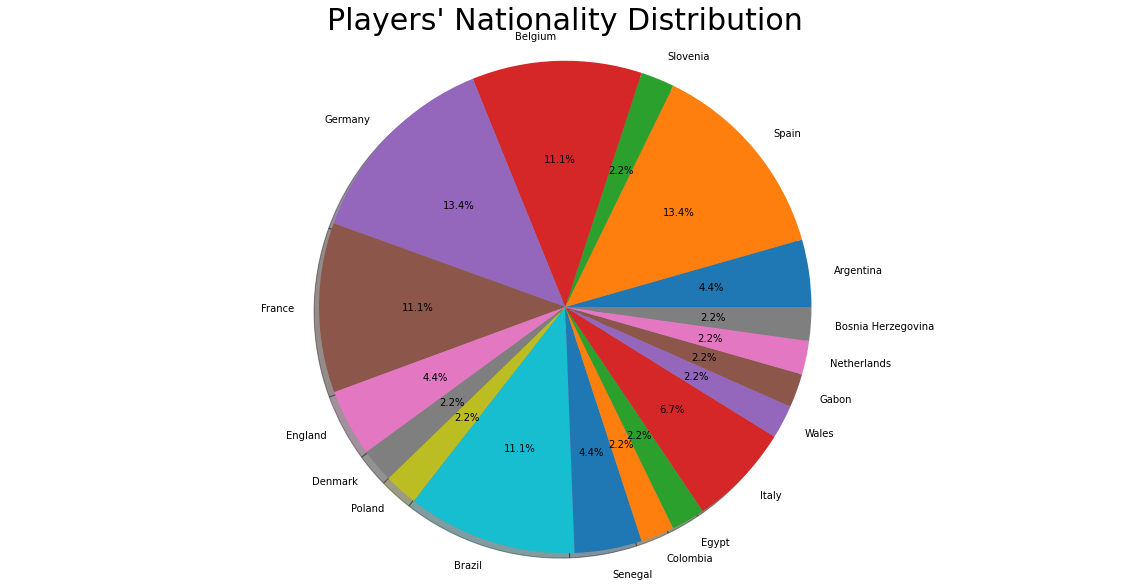

In [11]:
nation_column = final_set_df['Nationality'] 
nationality_dict = dict()

# Create a dictionary with nations and their count numbers
for nation in nation_column:
    if(nation not in nationality_dict):
        nationality_dict[nation] = nation_column[nation_column == nation].count()

number_countries = len(nationality_dict.keys())
number_players = sum(nationality_dict.values())

# Update the dictionary with percentage information
for key, value in nationality_dict.items():
    percentage = round(value * 100.0 / number_players, 1)
    nationality_dict[key] = percentage

print(nationality_dict)

fig, ax = plt.subplots(figsize=(20, 10))
ax.pie(nationality_dict.values(), labels=nationality_dict.keys(), autopct='%1.1f%%', shadow=True)
ax.axis('equal')
ax.set_title("Players' Nationality Distribution", fontsize=30, ha='center')

plt.show()

Lastly, we will group all positions we have in our final dataframe. After, we will create another graph in order to find our most favorable player.

In [12]:
# Group all positions and create a new column called "Position Grouped"
final_set_df['Position Grouped'] = np.select(
    [
        final_set_df['Position'].str.contains('GK'),
        final_set_df['Position'].str.endswith('B'),
        final_set_df['Position'].str.endswith('M') | final_set_df['Position'].str.endswith('W'),
        final_set_df['Position'].str.contains('ST') | final_set_df['Position'].str.endswith('F')
    ], 
    [
        'Goalkeeper',
        'Defender',
        'Midfielder',
        'Attacker'
    ], 
    default='Unknown'
)

final_set_df

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,International Reputation,Position,Position Grouped
15,P. Dybala,24,Argentina,89,94,Juventus,89000000.0,205000.0,3.0,LF,Attacker
3,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,4.0,GK,Goalkeeper
9,J. Oblak,25,Slovenia,90,93,Atlético Madrid,68000000.0,94000.0,3.0,GK,Goalkeeper
4,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,355000.0,4.0,RCM,Midfielder
18,M. ter Stegen,26,Germany,89,92,FC Barcelona,58000000.0,240000.0,3.0,GK,Goalkeeper
42,S. Umtiti,24,France,87,92,FC Barcelona,57000000.0,205000.0,3.0,CB,Defender
5,E. Hazard,27,Belgium,91,91,Chelsea,93000000.0,340000.0,4.0,LF,Attacker
16,H. Kane,24,England,89,91,Tottenham Hotspur,83500000.0,205000.0,3.0,ST,Attacker
30,Isco,26,Spain,88,91,Real Madrid,73500000.0,315000.0,3.0,LW,Midfielder
31,C. Eriksen,26,Denmark,88,91,Tottenham Hotspur,73500000.0,205000.0,3.0,CAM,Midfielder


{'Attacker': 8, 'Goalkeeper': 4, 'Midfielder': 24, 'Defender': 9}


[Text(0, 0.5, 'Position Name'),
 Text(0.5, 0, 'Count'),
 Text(0.5, 1.0, 'Total Count of Each Position on Final Dataset')]

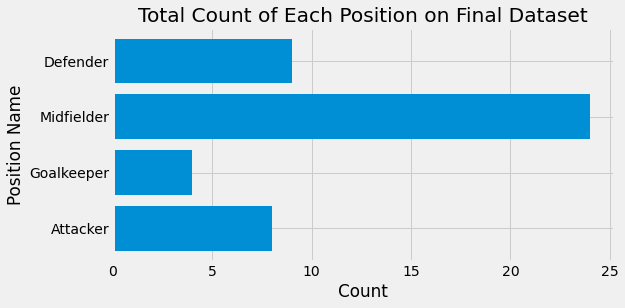

In [13]:
positions_dict = dict()
positions_dict = { value:final_set_df['Position Grouped'][final_set_df['Position Grouped'] == value].count() for key, value in final_set_df['Position Grouped'].items() if value not in positions_dict }

print(positions_dict)

position_names = list(positions_dict.keys())
position_count = list(positions_dict.values())

plt.style.use('fivethirtyeight')

fig, ax = plt.subplots(figsize=(8, 4))
ax.barh(position_names, position_count)
labels = ax.get_xticklabels()
plt.setp(labels, horizontalalignment="center")
ax.set(title="Total Count of Each Position on Final Dataset", ylabel="Position Name", xlabel="Count")

We will show top 3 players from our final dataset in categorical way.

In [14]:
top3_gk = final_set_df[final_set_df['Position Grouped'] == 'Goalkeeper'].nlargest(3, 'Overall')
top3_df = final_set_df[final_set_df['Position Grouped'] == 'Defender'].nlargest(3, 'Overall')
top3_mf = final_set_df[final_set_df['Position Grouped'] == 'Midfielder'].nlargest(3, 'Overall')
top3_st = final_set_df[final_set_df['Position Grouped'] == 'Attacker'].nlargest(3, 'Overall')
top3_players = top3_gk.append([top3_df, top3_mf, top3_st])
top3_players = top3_players.sort_values(by=['Position Grouped', 'Overall'])
top3_players

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,International Reputation,Position,Position Grouped
15,P. Dybala,24,Argentina,89,94,Juventus,89000000.0,205000.0,3.0,LF,Attacker
10,R. Lewandowski,29,Poland,90,90,FC Bayern München,77000000.0,205000.0,4.0,ST,Attacker
5,E. Hazard,27,Belgium,91,91,Chelsea,93000000.0,340000.0,4.0,LF,Attacker
42,S. Umtiti,24,France,87,92,FC Barcelona,57000000.0,205000.0,3.0,CB,Defender
44,K. Koulibaly,27,Senegal,87,90,Napoli,51000000.0,115000.0,3.0,LCB,Defender
34,M. Hummels,29,Germany,88,88,FC Bayern München,46000000.0,160000.0,4.0,LCB,Defender
18,M. ter Stegen,26,Germany,89,92,FC Barcelona,58000000.0,240000.0,3.0,GK,Goalkeeper
9,J. Oblak,25,Slovenia,90,93,Atlético Madrid,68000000.0,94000.0,3.0,GK,Goalkeeper
3,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,4.0,GK,Goalkeeper
14,N. Kanté,27,France,89,90,Chelsea,63000000.0,225000.0,3.0,LDM,Midfielder


Text(0.5, 0.98, 'Top \n3 Players')

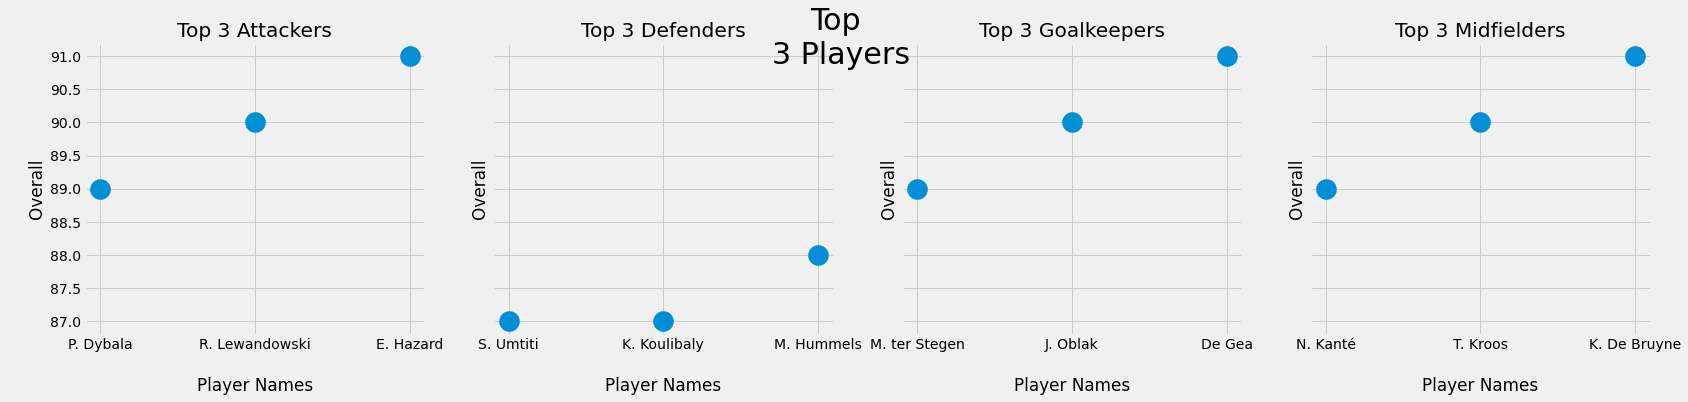

In [15]:
# data = top3_players['Name', 'Overall'].to_dict()
#names = list(data.keys())
#values = list(data.values())
names = top3_players['Name']
values = top3_players['Overall']

fig, axs = plt.subplots(1, 4, figsize=(25, 5), sharey=True)
axs[0].scatter(names[0:3], values[0:3], s=400)
axs[0].title.set_text('Top 3 Attackers')
axs[0].set_xlabel('\nPlayer Names')
axs[0].set_ylabel('\nOverall')
axs[1].scatter(names[3:6], values[3:6], s=400)
axs[1].title.set_text('Top 3 Defenders')
axs[1].set_xlabel('\nPlayer Names')
axs[1].set_ylabel('\nOverall')
axs[2].scatter(names[6:9], values[6:9], s=400)
axs[2].title.set_text('Top 3 Goalkeepers')
axs[2].set_xlabel('\nPlayer Names')
axs[2].set_ylabel('\nOverall')
axs[3].scatter(names[9:12], values[9:12], s=400)
axs[3].title.set_text('Top 3 Midfielders')
axs[3].set_xlabel('\nPlayer Names')
axs[3].set_ylabel('\nOverall')
fig.suptitle('Top \n3 Players', fontsize=30)


According to the filters we applied so far, we can think our most favorable players for each position as the following.
* **De Gea** for Goalkeeper position
* **M. Hummels** for Defensive position
* **K. De Bruyne** for Midfielder position
* **E. Hazard** for Attacker position